<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# **Taller 08: Simulated annealing**

## **Outline**

1. [Ejercicio 1. S.A. cost function](#eje1)
2. [Ejercicio 2. S.A. simule el problema](#eje2)





In [1]:
#@title 1. MONTAR EL DRIVE **student** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/ai-uis-student/talleres20211')
print(os.getcwd())
!chmod 777 convert_ipynb.sh run utils/*

Mounted at /content/drive
/content/drive/My Drive/ai-uis-student/talleres20211


---
#### - Usted debe ejecutar **TODAS** las celdas de tipo **CODE**. De lo contrario, sus respuestas no serán procesadas correctamente.

---

# **Simulated annealing: Comunicación en una mesa redonda**


Un grupo de 300 personas de diferentes países se sienta en una mesa circular con 300 sillas. Cada persona sabe hablar dos idiomas (no necesariamente los mismos para todos). Los idiomas se codificarán de la siguiente manera:

*   0: Español
*   1: Inglés
*   2: Alemán
*   3: Francés
*   4: Portugués
*   5: Mandarín
*   6: Coreano
*   7: Noruego
*   8: Italiano
*   9: Persa
*   10: Árabe

Para este taller una mesa se codifica como un arreglo de 300 posiciones, y en cada posición (silla de la mesa) existe una lista de los dos posibles idiomas. Observe la siguiente ilustración.

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/talleres20211/misc/mesaredonda01.png" />

Vamos a generar una **_buena_** solución para que se encuentre una disposición de las personas en la mesa de manera que cada persona pueda comunicarse con sus dos vecinos en la mesa.

- Tenga en cuenta que cada persona debe hablar dos idiomas **diferentes**. Es decir, si $(x_i, x_j)$ es la dupla de idiomas hablados por la persona, se tiene que cumplir que: $\enspace$ $x_i \neq x_j$

Para los siguientes puntos, la mesa redonda se simulará con el siguiente arreglo, donde cada solución es una permutación de los indices de la mesa. 

[189  44 188 111 252 275  26 106  10 155 146  53 148 122  32 164 125 132
 210 177  20 158 245 281 251 175 173 170 200  59  78 181  14 119 134 212
 220 178 107 187 253  62   7   0 113 215 241  50 297  40   9 272  66 226
 227 167  12 291  88 246  92  39 154 194 197 243  38 248 288 133  96 203
 260  99   1  45  35 152  28 249  42  91 147  22 201  15 117 267 141 165
 199 232  46  63 101  98 151  54 190 228 285 112 221 118  85 298  25  79
 192  58 284  80 160 242  83  73  86 121  89 255  71  74   6 277 239 159
 140  65  21 124  75 182 163  64 195 127 198  56 191 295 273  13 257 259
 136 211  61 235  52 290 103  48 171  41 258 266 109 217 204 296 268 153
   3  67 145 174  31  90 218  93 168 299 120 237 234 208 280  43 135 172
 157 270 293 108 185 247 156 129 143 126 276  24 287  23 219 123  94  68
 236 224 225 196  60 128 213 114  51  11 233  76 138  72 161  34  33 209
  77 166   5 186   4 230 205  82 261 283 162 274 282 269 131 100 202  55
 238 105 184 104  36 286 116 279 254 149  69  97  8

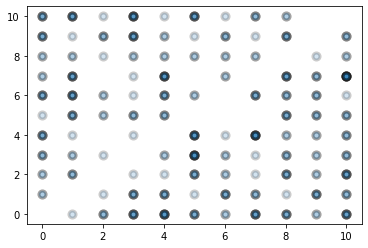

In [2]:
#@title **code** codificación de la mesa y dos posibles soluciones
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Generamos 300 personas con sus dos idiomas hablados
mesa_redonda = np.array([[7,4],[4,9],[0,4],[2,9],[3,0],[5,9],[9,3],[3,1],[7,0],[5,0],[5,10],[6,1],[1,7],[6,1],[0,9],[1,6],[4,7],[0,10],[1,7],[5,3],[8,2],[7,4],[10,1],[4,7],[2,6],[3,10],[5,6],[2,6],[5,2],[2,0],[9,4],[7,1],[1,8],[8,7],[5,3],[8,2],[3,9],[4,1],[5,6],[10,7],[4,6],[0,5],[4,3],[10,8],[5,10],[3,6],[10,4],[8,2],[6,7],[9,1],[4,0],[6,8],[8,6],[2,9],[10,1],[10,5],[5,8],[2,3],[8,9],[4,8],[8,5],[8,9],[7,6],[10,0],[2,1],[7,4],[10,7],[7,4],[5,4],[4,8],[8,0],[6,3],[0,4],[2,5],[9,4],[10,9],[0,6],[4,7],[10,7],[10,5],[9,6],[1,5],[3,1],[7,0],[10,2],[5,0],[4,7],[2,8],[0,3],[6,0],[9,7],[10,3],[10,7],[9,6],[3,10],[1,5],[2,5],[4,6],[6,2],[1,6],[9,0],[10,2],[4,0],[8,0],[6,9],[10,8],[1,0],[7,1],[0,4],[2,0],[5,4],[4,1],[7,2],[8,7],[4,6],[10,2],[3,10],[7,0],[2,10],[8,5],[0,9],[4,3],[3,9],[9,5],[5,0],[3,8],[4,7],[1,6],[0,9],[1,3],[4,5],[8,9],[8,10],[10,4],[8,4],[9,3],[6,3],[8,10],[9,8],[3,0],[10,0],[0,10],[3,5],[10,3],[8,3],[5,3],[1,10],[4,0],[4,9],[5,3],[5,4],[3,0],[10,0],[4,5],[1,6],[6,4],[6,2],[0,3],[0,10],[0,7],[6,9],[9,5],[1,2],[7,6],[0,6],[7,6],[4,2],[3,7],[5,3],[4,7],[10,9],[3,10],[10,7],[7,8],[9,5],[1,2],[8,1],[5,10],[8,6],[0,4],[7,3],[6,9],[7,10],[9,2],[9,7],[8,5],[3,1],[9,7],[1,3],[10,2],[8,0],[3,0],[5,1],[3,5],[6,1],[6,1],[9,6],[7,1],[3,10],[8,2],[3,9],[5,2],[0,1],[0,9],[3,1],[5,4],[1,10],[5,3],[1,10],[1,5],[10,7],[10,7],[9,2],[8,7],[7,9],[6,7],[10,6],[0,1],[5,8],[7,8],[7,10],[8,9],[3,10],[5,3],[8,5],[3,9],[7,6],[1,6],[8,7],[5,4],[2,9],[7,10],[1,10],[0,8],[8,7],[10,0],[5,10],[3,0],[5,10],[10,5],[10,2],[8,0],[4,6],[10,3],[8,3],[7,4],[1,2],[9,1],[7,0],[1,7],[6,0],[10,7],[0,3],[6,8],[8,6],[1,10],[8,4],[5,2],[3,9],[0,6],[10,7],[0,2],[5,2],[0,6],[10,9],[1,7],[0,10],[5,0],[1,4],[10,4],[4,1],[3,2],[4,0],[9,0],[7,4],[4,0],[1,9],[4,1],[9,1],[1,8],[3,4],[5,4],[3,8],[4,0],[1,5],[3,5],[0,8],[10,1],[4,10],[1,7],[10,0],[2,0],[7,4],[0,7],[4,5],[9,1],[6,10],[8,3],[0,2],[7,0]])
n_personas = len(mesa_redonda)

plt.scatter(mesa_redonda[:,0], mesa_redonda[:,1], s=50, alpha=0.2, edgecolors="black", linewidths=3)

solucion1 = np.random.permutation(n_personas)
solucion2 = np.random.permutation(n_personas)

print(solucion1)
print(solucion2)

# **Inicializar población**  <a name="eje1"></a>

Podemos usar la misma función de inicialización vista en clase, teniendo en cuenta que la codificación de las soluciones se simplifica a mutaciones. Entonces usaremos la siguiente función


In [3]:
#@title **code** generación de posibles formas de sentarse
def TSP_initialize_population1(n_individuals, n_personas):
    r = []
    for i in range(n_individuals):
        r.append(np.random.permutation(n_personas))
    return np.array(r)

# **Ejercicio 1. S.A. cost function**  <a name="eje1"></a>

Complete la función de costo ````TSP_cost1```` para ponderar cada solución teniendo en cuenta el número de vecinos que pueden hablarse, de la siguiente manera:

- Si no es posible hablar el mismo idioma que ambos vecinos, la función de costo debe incrementar 100 unidades.
- De lo contrario, la función de costo debe incrementar solamente 1 unidad.
- Tenga en cuenta los índices que corresponden a la primera posición (índice 0) y a la última posición (índice 299) son considerados **VECINOS**.


**Recomendación:** para simplificar el problema, valide que CUALQUIERA de los dos idiomas hablados por la persona SIGUIENTE, sea el mismo que CUALQUIERA de los dos idiomas que habla la persona actual.

**UTILICE LA MISMA FUNCIÓN DEL TALLER ANTERIOR**



In [4]:
#@title **Escriba su código aquí!**
#@markdown No modifique las dos últimas lineas

def TSP_cost1(personas, solution):
    costo = 0
    sol_personas = personas[solution]
    if sol_personas[0][0] in sol_personas[299] or sol_personas[0][1] in sol_personas[299]:
      costo += 1
    for i in range(sol_personas.shape[0]-1):
      if sol_personas[i][0] in sol_personas[i+1] or sol_personas[i][1] in sol_personas[i+1]:
        costo += 1
      else:
        costo +=100
    return costo



import urllib.parse, inspect
src1 = urllib.parse.quote_plus(inspect.getsource(TSP_cost1))

In [ ]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PS7_1 $src1

evaluation result CORRECT


# **Ejercicio 2.**  <a name="eje2"></a>

Simule el algoritmo de simulated annealing en el problema de la mesa redonda. Puede utilizar también las funciones vistas en clase. 

- Al final escriba algunas conclusiones relacionadas con las siguientes preguntas orientadoras para comparar esta solución con la GA. 

- En cuanto al número de iteraciones ¿cuál método es mas eficiente?
- En cuanto a menor costo ¿cuál método es mejor?
- ¿Qué ventajas puede resaltar de simmulated annealing?

RESPUESTAS A LAS PREGUNTAS PROPUESTAS

1) En cuanto al número de iteraciones ¿cuál método es mas eficiente?
RTA: El método más eficiente es el algoritmo genetico ya que requiere menos iteraciones a diferencia del simulated annealing

2) En cuanto a menor costo ¿cuál método es mejor?
RTA: En cuanto al mejor costo es mejor el algoritmo del simulated annealing respecto a que este tiene un costo de tiempo de 01:05 y el algoritmo genetico tiene un coste de 04:46

3) ¿Qué ventajas puede resaltar de simmulated annealing?
RTA: En cuanto al bajo coste de tiempo se resalta la capacidad del algoritmo simulated annealing ya que es muy utilitario a la hora de realizar muchas pruebas e iteraciones 

Teniendo en cuenta la codificación del problema, podemos usar las funciones de mutación que vimos en clase.

In [20]:
#@title **code** mutation
def TSP_mutate1(solution, mutation_prob):
    mutated_solution = np.copy(solution)
    for i in range(len(solution)):
        if np.random.random()<mutation_prob:
            j = i+1 if i!=len(solution)-1 else 0
            tmp = mutated_solution[i]
            mutated_solution[i] = mutated_solution[j]
            mutated_solution[j] = tmp
    return mutated_solution

In [21]:
# Escriba aca la simulación con simulated annealing! 
def TSP_neighbour(solution):
    i1 = np.random.randint(len(solution))
    i2 = i1+1 if i1<len(solution)-1 else 0
    r = np.copy(solution)
    r[i1]=solution[i2]
    r[i2]=solution[i1]
    return r



#Función recursiva, entre más iteraciones, más cambios habra y por ende no convergerá
def TSP_neighbour2(solution):
    return TSP_neighbour(TSP_neighbour(solution))

In [22]:
%%writefile sa.py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm




def plot_evolution(bests, means, stds):
    plt.plot(means, label="means")
    plt.plot(bests, label="bests")
    plt.fill_between(range(len(means)), means-stds, means+stds, color="yellow", alpha=0.2)
    plt.legend()

def TSP_plot_result(best, bests, means, stds):
    fig = plt.figure(figsize=(12,4))
    fig.add_subplot(121)
    plot_evolution(bests, means, stds)





def run_sa(n_individuals, n_cooling_steps, init_population_function, cost_function, generate_neighbor_function):

    pop = init_population_function(n_individuals)

    mean_costs = []
    std_costs  = []
    best_costs = []
    best_sols  = []

    min_cost = np.inf
    min_sol  = None

    for T in tqdm(np.linspace(1,0,n_cooling_steps)):
        costs = []
        for i in range(len(pop)):
            sol = pop[i]
            cost_sol = cost_function(sol)

            # generate a neighbour
            nbr = generate_neighbor_function(sol)
            cost_nbr = cost_function(nbr)

            # if the neighbour is better
            if cost_nbr<cost_sol or np.random.random()<T:
                sol = nbr
                cost_sol = cost_nbr

            pop[i] = sol
            costs.append(cost_sol)

            if cost_sol < min_cost:
                min_sol  = np.copy(pop[i])
                min_cost = cost_function(pop[i])

        best_costs.append(np.min(costs))
        mean_costs.append(np.mean(costs))
        std_costs.append(np.std(costs))

    mean_costs = np.array(mean_costs)
    std_costs  = np.array(std_costs)
    best_costs = np.array(best_costs)
    
    return min_sol, best_costs, mean_costs, std_costs

Overwriting sa.py


  0%|          | 0/1200 [00:00<?, ?it/s]

<Figure size 432x288 with 0 Axes>

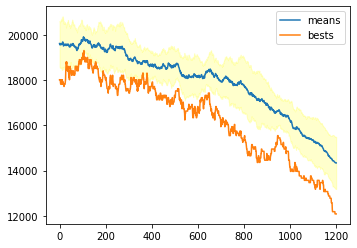

In [23]:
%run sa.py

n_individuals = 10
n_cooling_steps = 1200


bestsol, bests, means, stds = run_sa(n_individuals              = n_individuals, 
                                     n_cooling_steps            = n_cooling_steps, 
                                     init_population_function   = lambda x: TSP_initialize_population1(x, n_personas), 
                                     cost_function              = lambda x: TSP_cost1(mesa_redonda, x),
                                     generate_neighbor_function = TSP_neighbour2)


TSP_plot_result(bestsol, bests, means, stds)

# **Pasos Finales.**



#### 1. Reemplace la variable con su código de estudiante

In [24]:
#@title **1. Complete la siguiente información:**
taller_name = "Taller_std_08_20211" #@param {type:"string"}
codigo_name = "tl8_2173051" #@param {type:"string"}


import urllib.parse, inspect
taller = urllib.parse.quote_plus(taller_name)
codigo = urllib.parse.quote_plus(codigo_name)

print(taller, codigo)

Taller_std_08_20211 tl8_2173051


In [25]:
#@title **2. Guarde los cambios del taller**
%%javascript
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});

<IPython.core.display.Javascript object>

In [26]:
#@title **3. Ejecute la siguiente celda y envíe el archivo**
!./convert_ipynb.sh $codigo $taller

uno: tl8_2173051 dos Taller_std_08_20211
¡PERFECTO!, el archivo   'tl8_2173051.ipynb'   se creó correctamente :D


---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>